In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib notebook

In [2]:
import pandas as pd

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [3]:
tabla1 = pd.read_csv('scope_2.csv',sep=',',skiprows=1)

In [4]:
tabla1.head()

,second,Volt,Volt.1,Volt.2,Volt.3
0,-5.00000,40.943222,49.974998,50.154890,-0.145146
1,-4.99984,40.943222,49.974998,50.154890,-0.145146
2,-4.99968,40.943222,51.985049,48.144840,-0.141126
3,-4.99952,42.953272,49.974998,48.144840,-0.145146
4,-4.99936,42.953272,49.974998,-2.106418,-0.141126


In [6]:
np.diff(tabla1.second)

array([0.00016, 0.00016, 0.00016, ..., 0.00016, 0.00016, 0.00016])

<IPython.core.display.Javascript object>


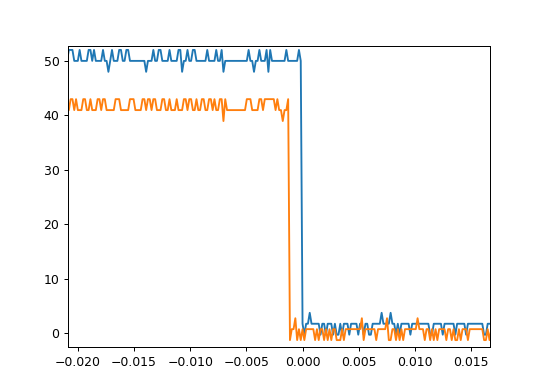

In [7]:
plt.figure()
plt.plot(tabla1.second, tabla1['Volt.1'])
plt.plot(tabla1.second, tabla1['Volt'])


In [60]:
# El desplazamiento maximo Amax (en mm) para el modelo V406 de Bruel y Kjaer viene dado
# la relacion de abajo
# m: masa que se tiene que vibrar (en kg)
def Amax(m):
    return (0.5*(8.8-2*m*9.8/12.3))

# Gmax es la aceleracion maxima que se puede alcanzar con una masa m sobre el V406 es
# en unidades de g, G(Amax(m),f), tal como se define abajo,
# donde en general Gamma = 4 pi A f**2 /g es la aceleracion en unidades de g, dadas 
# una amplitud A y una frecuencia f de vibracion

def G(A, f):
    G = 10
    G1 = 1.e-3 * A* (2*np.pi*f)**2 / 9.8 
    if (G1 < G):
        # regimen limitado por amplitud (baja frecuencia)
        G = G1
        AM = A
    else:
        # regimen limitado por potencia (aceleración; a alta frecuencia)
        G = 10
        AM = 1.e3 * G * 9.8 / (2* np.pi * f)**2
    return AM, G

In [186]:
flim = 9000 * 2
max_forcing = np.array([[i*0.5, G(Amax(2), i*0.5)[0], G(Amax(2), i*0.5)[1]] for i in range(flim+1)]) .T

Paso a regimen de alta frecuencia en :  30.0  Hz


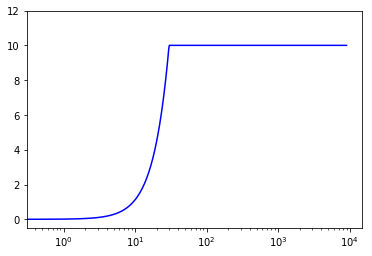

In [191]:
plt.xscale('log')
plt.ylim(-0.5,12)
plt.plot( max_forcing[0], max_forcing[2], color='b')
print ( 'Paso a regimen de alta frecuencia en : ', 
       max_forcing[0][np.where(max_forcing[2]>=10)[0][0]], ' Hz')

In [218]:
# Escribir resultados a archivo
with open('max_forcing.dat', 'w+') as archivo:
    archivo.write('# \tf \t A \t\t G \n')
    for i in range(len(max_forcing.T)):
        archivo.write('{0:10.1f} {1:14.10f} {2:10.3f}\n'.format( max_forcing.T[i][0], max_forcing.T[i][1], max_forcing.T[i][2]) )
archivo.close()

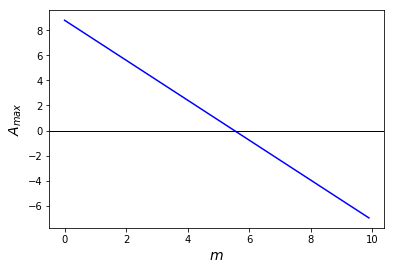

In [3]:
# GRAFICA del decrecimiento de la amplitud maxima al aumentar la carga (m, en kg)

plt.axis('on')
plt.xlabel(r'$m$',fontsize=14)
plt.ylabel(r'$A_{max}$',fontsize=14)
plt.plot(np.arange(0,10,0.1),Amax(np.arange(0,10,0.1)),color='b')
plt.axhline(y=0, color='k',linewidth=1)

In [83]:
# Defino la masa limite como la carga a la cual la amplitud maxima efectiva ya es 0
mlimite = optimize.root_scalar(Amax,bracket=[0,10],method='brentq')

In [84]:
mlimite

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 5.522448979591838

In [122]:
# Valor numerico de la masa limite (kg)
round(mlimite.root,2)

5.52

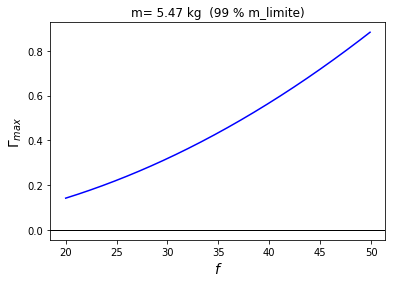

In [162]:
# GRAFICA de la aceleracion maxima para 99% masa limite en funcion de frecuencia f (Hz)
plt.title('m= '+str(round(0.99*mlimite.root,2))+' kg  (99 % m_limite)')
plt.axis('on')
plt.xlabel(r'$f$',fontsize=14)
plt.ylabel(r'$\Gamma_{max}$',fontsize=14)
plt.plot(np.arange(20,50,0.1), G(Amax(0.99*mlimite.root),np.arange(20,50,0.1)),color='b')
plt.axhline(y=0, color='k',linewidth=1)

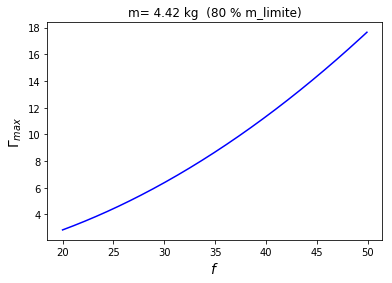

In [161]:
# GRAFICA de la aceleracion maxima para 80% masa limite en funcion de frecuencia f (Hz)
plt.title('m= '+str(round(0.80*mlimite.root,2))+' kg  (80 % m_limite)')
plt.axis('on')
plt.xlabel(r'$f$',fontsize=14)
plt.ylabel(r'$\Gamma_{max}$',fontsize=14)
plt.plot(np.arange(20,50,0.1), G(Amax(0.8*mlimite.root),np.arange(20,50,0.1)),color='b')


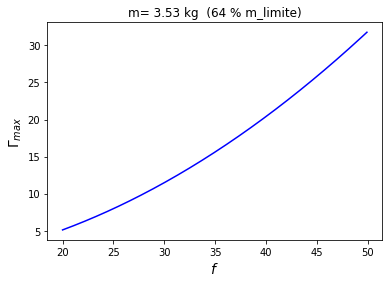

In [160]:
# GRAFICA de la aceleracion maxima para 64 % masa limite en funcion de frecuencia f (Hz)
plt.title('m= '+str(round(0.64*mlimite.root,2))+' kg  (64 % m_limite)')
plt.axis('on')
plt.xlabel(r'$f$',fontsize=14)
plt.ylabel(r'$\Gamma_{max}$',fontsize=14)
plt.plot(np.arange(20,50,0.1), G(Amax(0.64*mlimite.root),np.arange(20,50,0.1)),color='b')
